# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [21]:
import main
import helper_to_main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

A^T@A
15.2 µs ± 737 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
11.5 µs ± 2.93 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 121.46 MiB, increment: 0.00 MiB

lstsq
78.6 µs ± 13.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 121.47 MiB, increment: 0.00 MiB

QR
38.6 µs ± 3.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
24.4 µs ± 3.58 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 121.47 MiB, increment: 0.00 MiB

SVD
73.3 µs ± 17.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
3.11 µs ± 900 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
18.1 µs ± 8.62 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 121.47 MiB, increment: 0.00 MiB



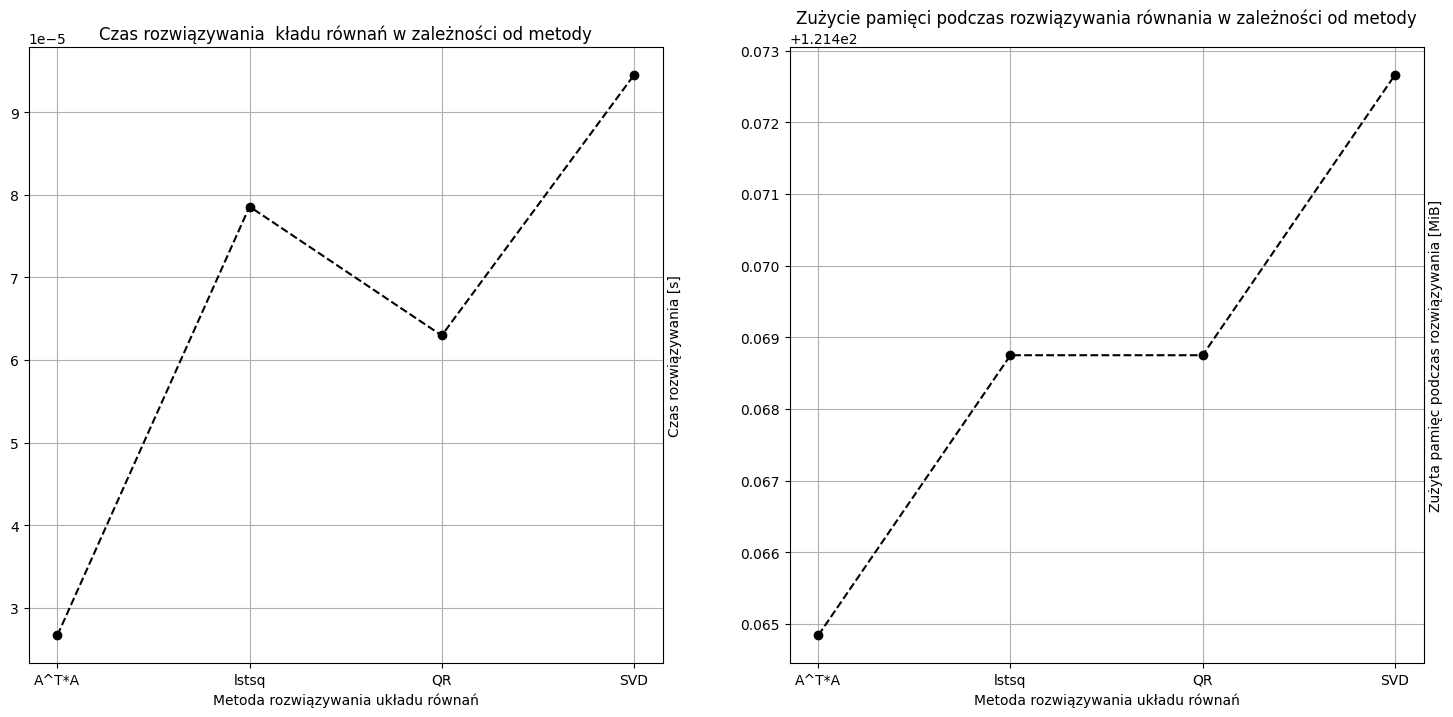

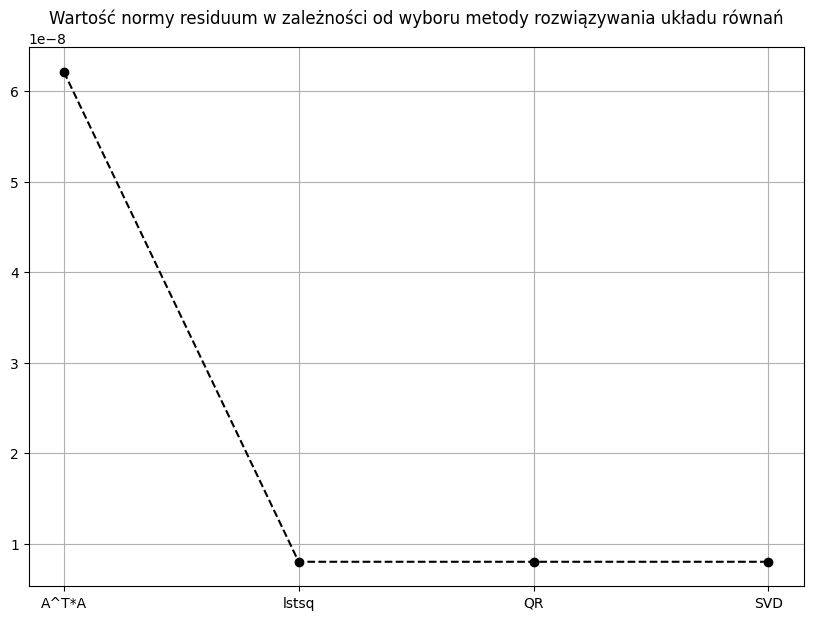

In [22]:
# memit i timeit i residual norm wykresy
m = 50
n = 12
A, b = helper_to_main.spare_matrix_Abt(m, n)
times = []
memory = []

# sposób 1

print('A^T@A')
new_A, new_b = main.square_from_rectan(A, b) # przeksztalca A w kwadratowa i modyfikuje b
saved_timing1 = %timeit -r 5 -n 10 -o main.square_from_rectan(A, b)
saved_timing2 = %timeit -r 5 -n 10 -o np.linalg.solve(new_A, new_b)
used_memory = %memit -o np.linalg.solve(new_A, new_b)
x_1 = np.linalg.solve(new_A, new_b)
times.append(saved_timing1.average+saved_timing2.average)
memory.append(used_memory.mem_usage[0])
print()

# sposób 2

print('lstsq')
saved_timing = %timeit -r 5 -n 10 -o np.linalg.lstsq(A, b, rcond=None)
used_memory = %memit -o np.linalg.lstsq(A, b, rcond=None)
x_2 = np.linalg.lstsq(A, b, rcond=None)[0]
times.append(saved_timing.average)
memory.append(used_memory.mem_usage[0])
print()

# sposób 3

print('QR')
Q, R = np.linalg.qr(A) # Q unitarna i R trojkatna gorna
saved_timing1 = %timeit -r 5 -n 10 -o np.linalg.qr(A)
saved_timing2 = %timeit -r 5 -n 10 -o sp.linalg.solve_triangular(R, np.transpose(Q)@b)
used_memory = %memit -o sp.linalg.solve_triangular(R, np.transpose(Q)@b)
x_3 = sp.linalg.solve_triangular(R, np.transpose(Q)@b)
times.append(saved_timing1.average+saved_timing2.average)
memory.append(used_memory.mem_usage[0])
print()

# sposób 4

print('SVD')
U, sigma, V = np.linalg.svd(A, full_matrices=False) # rozklad SVD
sigma = np.diag(sigma)
saved_timing1 = %timeit -r 5 -n 10 -o np.linalg.svd(A, full_matrices=False)
saved_timing2 = %timeit -r 5 -n 10 -o np.diag(sigma)
saved_timing3 = %timeit -r 5 -n 10 -o V@np.linalg.solve(sigma, np.transpose(U)@b)
used_memory = %memit -o V.T@np.linalg.solve(sigma, np.transpose(U)@b)
x_4 = V.T@(np.linalg.solve(sigma, U.T@b))
times.append(saved_timing1.average+saved_timing2.average+saved_timing3.average)
memory.append(used_memory.mem_usage[0])
print()

solutions = [x_1, x_2, x_3, x_4]
residuals = []

for sol in solutions:
    residuals.append(main.residual_norm(A, sol, b))

plt.figure(figsize=(18, 8))
ax = plt.subplot(1, 2, 1)

labels = ['A^T*A', 'lstsq', 'QR', 'SVD']
x_labels = np.array([i for i in range(4)])
plt.xticks(x_labels, labels)
ax.plot(labels, times, 'ko--')
ax.set(xlabel='Metoda rozwiązywania układu równań', ylabel='Czas rozwiązywania [s]', 
        title='Czas rozwiązywania  kładu równań w zależności od metody')
ax.yaxis.set_label_position('right')        
plt.grid()

ax = plt.subplot(1, 2, 2)

ax.plot(labels, memory, 'ko--')
ax.set(xlabel='Metoda rozwiązywania układu równań', ylabel='Zużyta pamięc podczas rozwiązywania [MiB]', 
        title='Zużycie pamięci podczas rozwiązywania równania w zależności od metody')
ax.yaxis.set_label_position('right')
plt.grid()
plt.show()

plt.figure(figsize=(10, 7))
labels = ['A^T*A', 'lstsq', 'QR', 'SVD']
x_labels = np.array([i for i in range(4)])
plt.xticks(x_labels, labels)
plt.plot(x_labels, residuals, 'ko--')
ax.set(xlabel='Metoda rozwiązywania równania', ylabel='Wartość normy residuum')
plt.title(label='Wartość normy residuum w zależności od wyboru metody rozwiązywania układu równań')
plt.grid()


***Zadanie 2***

Utwórz dwa wektory $x_1$ oraz $x_2$ opiujące dochód i wydatki pewnego gospodarstwa.

Dochody = [210, 270, 290, 310, 370, 400, 450, 480, 510, 520]

Wydatki = [140, 190, 250, 270, 290, 310, 340, 360, 420, 390]

Utwórz regresję liniową zależności wydatków od dochodów.

Jaki jest błąd uzyskanej prostej względem danych? Czy jest możliwość uzyskania lepszego wyniku?

W celu wyznaczenia współczynników wykorzystaj niniejszą informację https://en.wikipedia.org/wiki/Simple_linear_regression


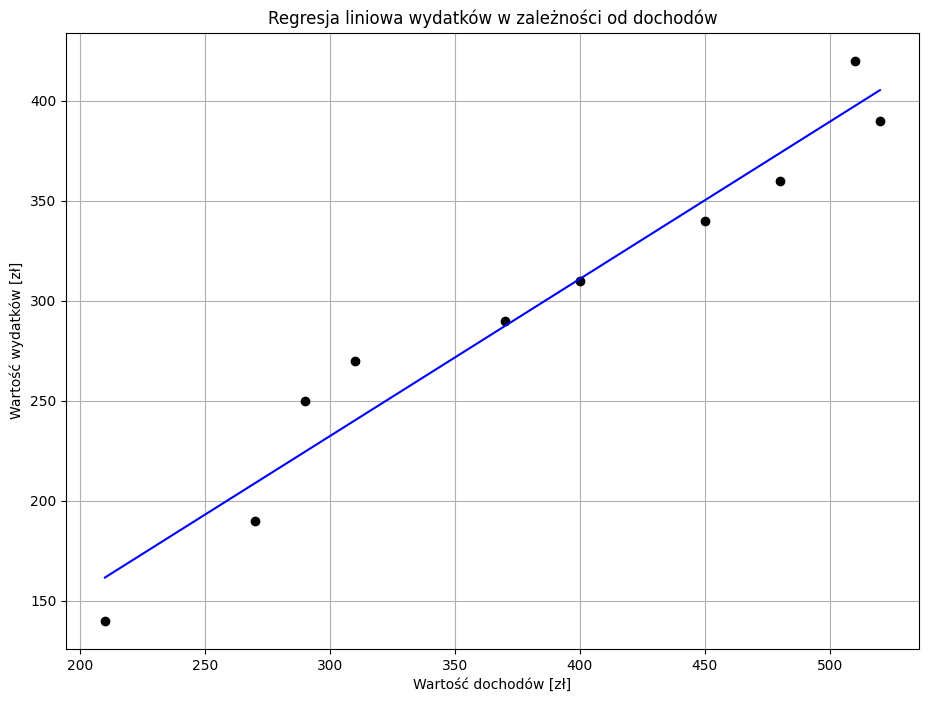

Średni błąd bezwzględny wynosi: 16.11766927944094


In [23]:
dochody = [210, 270, 290, 310, 370, 400, 450, 480, 510, 520] # x
wydatki = [140, 190, 250, 270, 290, 310, 340, 360, 420, 390] # y

mean_x = np.mean(dochody)
mean_y = np.mean(wydatki)

numerator = 0
denominator = 0

for index, value in enumerate(dochody):
    numerator += wydatki[index]*(value-mean_x)
    denominator += (value - mean_x)**2

a = numerator/denominator
b = mean_y - a*mean_x

values = [a*elem + b for elem in dochody]

plt.figure(figsize=(11, 8))
ax = plt.subplot()
plt.plot(dochody, wydatki, 'ko')
plt.plot(dochody, values, 'b')
ax.set(xlabel='Wartość dochodów [zł]', ylabel='Wartość wydatków [zł]')
plt.title(label='Regresja liniowa wydatków w zależności od dochodów')
plt.grid()
plt.show()

errors = 0

for index, value in enumerate(wydatki):
    errors += np.abs(value-values[index])

errors = errors/len(wydatki)
print('Średni błąd bezwzględny wynosi:', errors) # sredni blad bezwzgledny

***Zadanie 3***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

In [24]:
x1 = np.random.normal(loc=0, scale=1, size=(100, 1))
x2 = np.random.normal(loc=0, scale=1, size=(100, 1))
epsilon = np.random.normal(loc=0, scale=1, size=(100, 1))
ones = np.ones(shape=(100, 1))

y = 2 + x1 - 0.5*x2 + epsilon

x1_ones = np.concatenate((ones, x1), axis=1)
x2_ones = np.concatenate((ones, x2), axis=1)
x1_x2_ones = np.concatenate((ones, x1, x2), axis=1)

pred1=[min(x1), max(x1)]
pred2=[min(x2), max(x2)]

In [25]:
Q, R = np.linalg.qr(x1_ones)
B = sp.linalg.solve_triangular(R, Q.T@y)
y1 = B[0] + B[1]*pred1

Q, R = np.linalg.qr(x2_ones)
B = sp.linalg.solve_triangular(R, Q.T@y)
y2 = B[0] + B[1]*pred2

Q, R = np.linalg.qr(x1_x2_ones)
B = sp.linalg.solve_triangular(R, Q.T@y)
y3 = B[0] + B[1]*x1 + B[2]*x2

Q, R = np.linalg.qr(x2_ones)
B = sp.linalg.solve_triangular(R, Q.T@y)
y4 = B[0] + B[1]*x2 + B[1]*x2

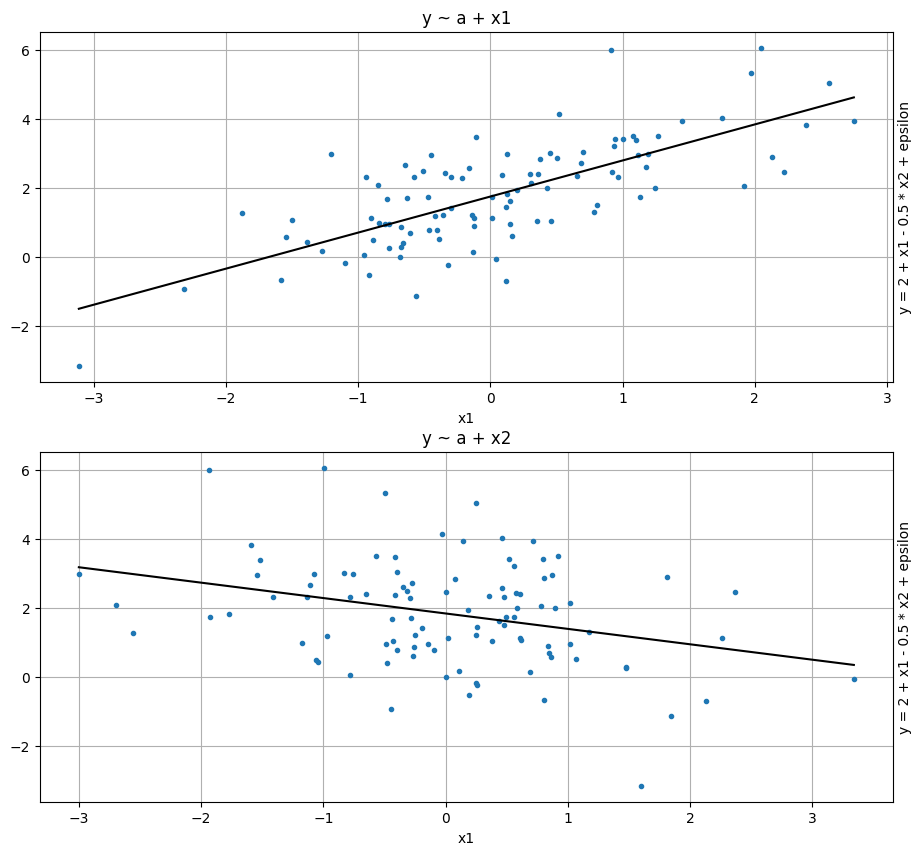

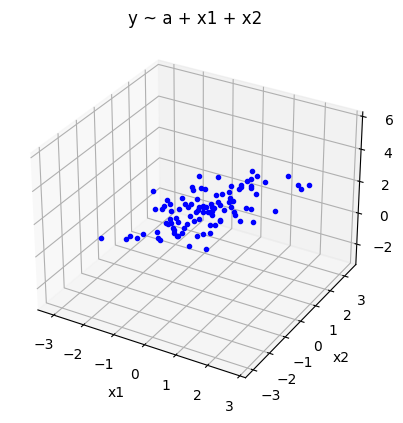

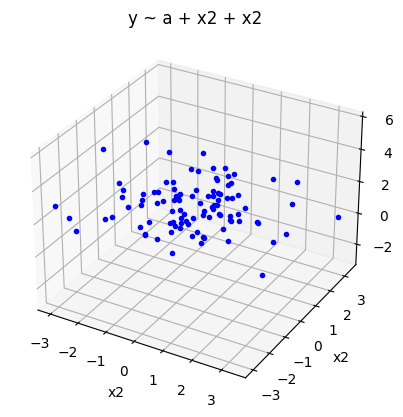

In [26]:
plt.figure(figsize=(11, 10))
ax = plt.subplot(2, 1, 1)
ax.plot(x1, y, '.')
ax.plot(pred1, y1, 'k')
ax.yaxis.set_label_position('right')
ax.set(xlabel='x1', ylabel='y = 2 + x1 - 0.5 * x2 + epsilon')
plt.title('y ~ a + x1')
plt.grid()

ax = plt.subplot(2, 1, 2)
ax.plot(x2, y, '.')
ax.plot(pred2, y2, 'k')
ax.yaxis.set_label_position('right')
ax.set(xlabel='x1', ylabel='y = 2 + x1 - 0.5 * x2 + epsilon')
plt.title('y ~ a + x2')
plt.grid()

plt.show()

plt.figure()
ax = plt.axes(projection='3d')
ax.plot(x1, x2, y, 'b.')
ax.set(xlabel='x1', ylabel='x2', zlabel='y')
plt.title(label='y ~ a + x1 + x2')
plt.grid()
plt.show()

plt.figure()
ax = plt.axes(projection='3d')
ax.plot(x2, x2, y, 'b.')
ax.set(xlabel='x2', ylabel='x2', zlabel='y')
plt.title(label='y ~ a + x2 + x2')
plt.grid()
plt.show()

Wnioski:
Laboratorium zapoznało mnie z różnymi metodami rozwiązywania układów równań z macierzą prostokątną. Zbadałem różnice w czasie rozwiązywania oraz zużycie pamięci przez każdą metodę. Dodatkowo pochyliłem się nad problemem regresji liniowej na podstawie kilku przykładów. Jak co laboarotium utrwaliłem wiedzę dotycząca prezentacji danych na wykresach oraz rozszerzyłem ją o wykresy 3D.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)